# Лабораторная Работа №1

Шевченко М.А.  
группа ИУ3-42М  
Вариант №12  

In [1]:
from itertools import product
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima.model import ARIMA

In [2]:
DATA_PATH = os.path.join('data', 'Lab1', 'ser24.txt')

In [3]:
with open(DATA_PATH, 'r') as f:
    points = [float(i.strip().replace(',', '.')) for i in f.readlines()]

points = pd.Series(points)

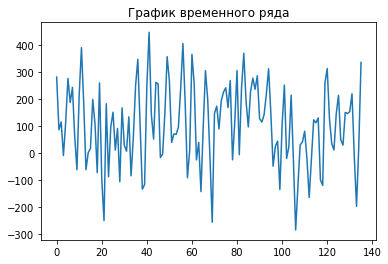

In [4]:
ax = plt.subplot()
ax.plot(points)
ax.set_title('График временного ряда')
plt.show()

## АКФ (АвтоКорреляционная Функция)

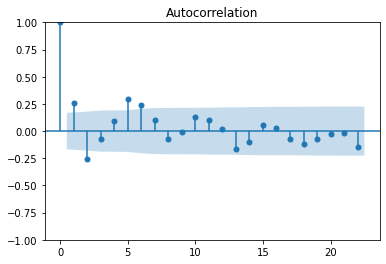

In [5]:
_ = tsaplots.plot_acf(points)

АКФ имеет значимые лаги от 0 до 6, следовательно выборку можно описать процессом скользящего среднего, имеющим не более 6 членов. __MA=6__ 

In [6]:
MA_MAX = 6

## ЧАКФ (Частная АвтоКорреляционная Функция)

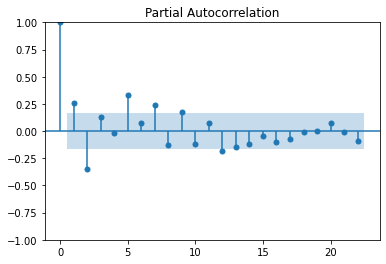

In [7]:
_ = tsaplots.plot_pacf(points, method='ywm')

ЧАКФ имеет значимые лаги 1, 2, следовательно выборку можно описать процессом авторегрессии, имеющим не более 2 членов. __AR=2__

In [8]:
AR_MAX = 2

## Train/Test разбивка

In [9]:
train, test = train_test_split(points, test_size=0.15, shuffle=False)

## ARIMA

In [10]:
best_aic_bic_avg = None
best_model = None
best_results = None
for ar, ma in product(range(AR_MAX + 1), range(MA_MAX + 1)):
    print(f'{ar=}, {ma=}')
    # пропускаем вырожденный случай
    if (ar, ma) == (0, 0):
        continue
    model = ARIMA(train, order=(ar, 0, ma))
    results = model.fit()
    # пропускаем модели с незначимыми коэффициентами
#     if np.any(results.pvalues < 0.05):
#         print('Пропустил модель с незначимыми коэффициентами')
#         continue
    cur_aic_bic_avg = (results.aic + results.bic) / 2
    if best_aic_bic_avg is None or best_aic_bic_avg < cur_aic_bic_avg:
        best_aic_bic_avg = cur_aic_bic_avg
        best_model = model
        best_results = results
        print('Сменил модель')

ar=0, ma=0
ar=0, ma=1
Сменил модель
ar=0, ma=2
ar=0, ma=3
ar=0, ma=4


E:\Projects\IU3-Time-Series-Analysis-and-Forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Projects\IU3-Time-Series-Analysis-and-Forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ar=0, ma=5
ar=0, ma=6


E:\Projects\IU3-Time-Series-Analysis-and-Forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\Projects\IU3-Time-Series-Analysis-and-Forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ar=1, ma=0
Сменил модель
ar=1, ma=1
ar=1, ma=2
ar=1, ma=3
ar=1, ma=4
ar=1, ma=5


E:\Projects\IU3-Time-Series-Analysis-and-Forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ar=1, ma=6


E:\Projects\IU3-Time-Series-Analysis-and-Forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ar=2, ma=0
ar=2, ma=1
ar=2, ma=2


E:\Projects\IU3-Time-Series-Analysis-and-Forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ar=2, ma=3
ar=2, ma=4
ar=2, ma=5


E:\Projects\IU3-Time-Series-Analysis-and-Forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ar=2, ma=6


E:\Projects\IU3-Time-Series-Analysis-and-Forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\Projects\IU3-Time-Series-Analysis-and-Forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
best_ar = best_results.model_orders['ar']
best_ma = best_results.model_orders['ma']
print(f'Модель с AR={best_ar}, MA={best_ma} оказалась лучшей по среднему между AIC и BIC.')

Модель с AR=1, MA=0 оказалась лучшей по среднему между AIC и BIC.


In [12]:
best_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -734.654
Date:                Thu, 21 Apr 2022   AIC                           1475.308
Time:                        20:47:32   BIC                           1483.543
Sample:                             0   HQIC                          1478.651
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.1725     18.448      5.810      0.000      71.016     143.329
ar.L1          0.2672      0.104      2.564      0.010       0.063       0.471
sigma2      2.073e+04   3442.047      6.021      0.000     1.4e+04    2.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.38   Prob(JB):                         0.31
Heteroskedasticity (H):               0.92   Skew:                            -0.17
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
pred = best_results.predict(start=(len(train)-1), end=(len(train)-1 + len(test)))
indexes = range(len(train)-1, len(train) + len(test))

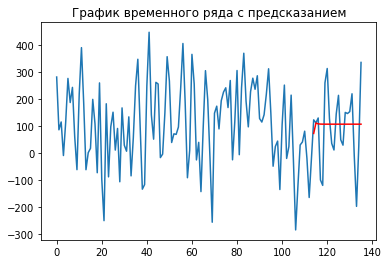

In [14]:
ax = plt.subplot()
ax.set_title('График временного ряда с предсказанием')
ax.plot(points)
ax.plot(indexes, pred, color='red')
plt.show()